## Exploratory Data Analysis & Intro


# Goal
Investigate top-paying roles and skills in the data science industry.

Use Python to explore a real-live dataset on job postings.

For job-seekers: use these insights to help find the best job opportunities.


# Questions to Answer
What are the most demanded skills for the top 3 most popular data roles?

How are in-demand skills trending for Data Analysts?

How well do jobs and skills pay for Data Analysts?

What is the most optimal skill to learn for Data Analysts? (High Demand AND High Paying)

I'll be focusing on US Data Analyst roles, but you can adapt to any of the following:

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

/opt/miniconda3/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df.job_skills.apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


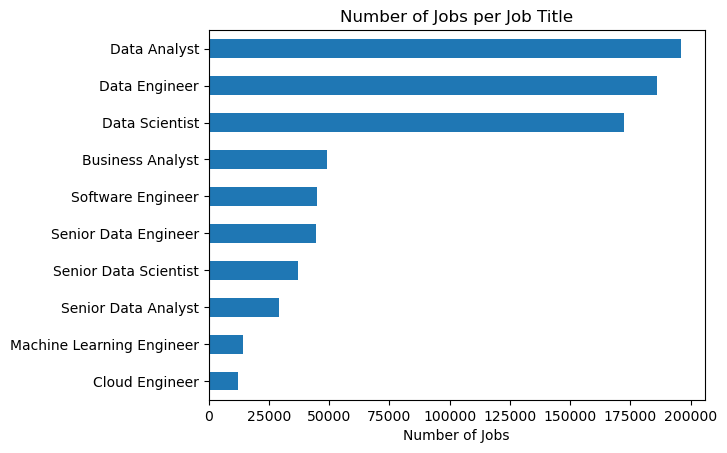

In [23]:
# Number of jobs titles per job title
df.job_title_short.value_counts().plot(kind = 'barh')
ax = plt.gca()
ax.invert_yaxis()
ax.set_title('Number of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

In [16]:
import seaborn as sns

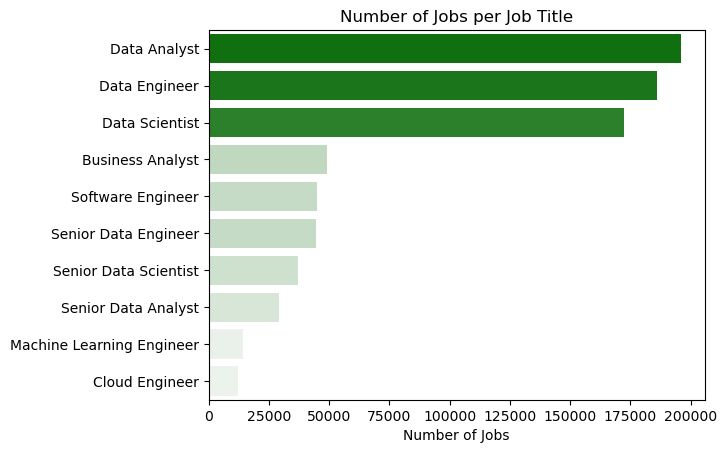

In [25]:
# Number of jobs titles per job title

job_postings = df.job_title_short.value_counts().reset_index(name = 'job_count')


sns.barplot(data = job_postings, x = 'job_count', y = 'job_title_short', hue = 'job_count', palette='light:g', legend = False)
ax = plt.gca()
ax.set_title('Number of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()


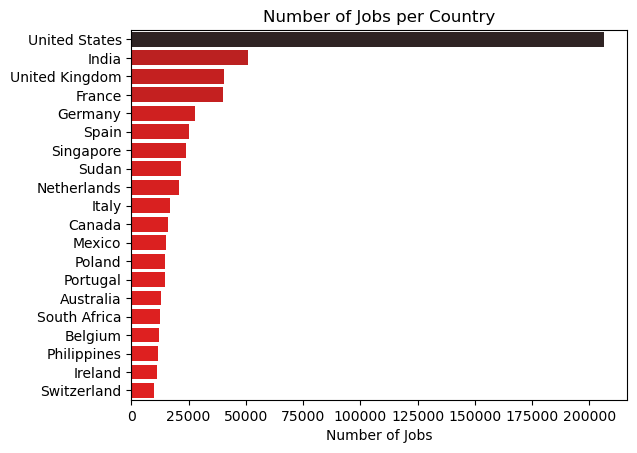

In [33]:
# Number of jobs titles per country

job_postings = df.job_country.value_counts().head(20).reset_index(name = 'job_count')

sns.barplot(data = job_postings, x = 'job_count', y = 'job_country', hue = 'job_count', palette='dark:r_r', legend = False)
ax = plt.gca()
ax.set_title('Number of Jobs per Country')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

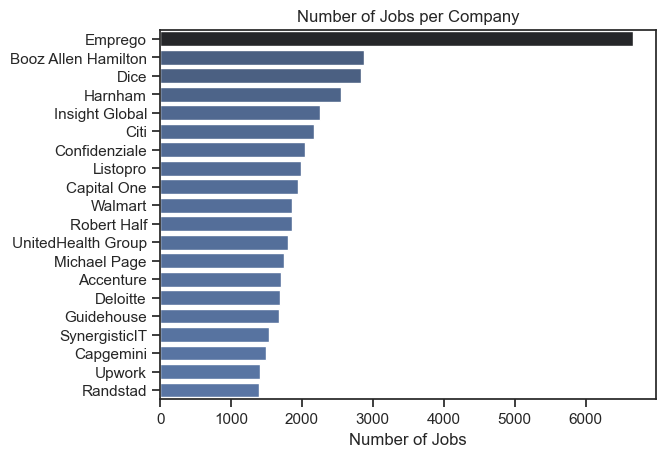

In [53]:
# Number of jobs titles per company

job_postings = df.company_name.value_counts().head(20).reset_index(name = 'job_count')

sns.set_theme(style='ticks')
sns.barplot(data = job_postings, x = 'job_count', y = 'company_name', hue = 'job_count', palette='dark:b_r', legend = False)
ax = plt.gca()
ax.set_title('Number of Jobs per Company')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

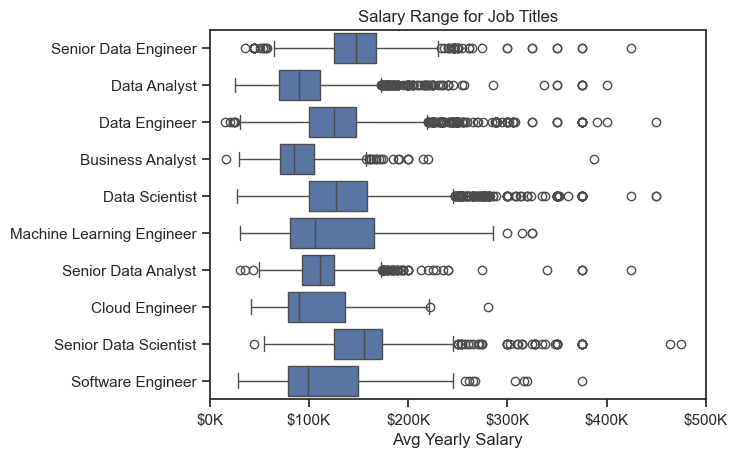

In [44]:
# salaries range by job titles

sns.boxplot(data = df, x = 'salary_year_avg', y = 'job_title_short')
plt.title('Salary Range for Job Titles')
plt.xlabel('Avg Yearly Salary')
plt.ylabel('')
ax = plt.gca() # gca = get current axis
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0,500_000)

plt.show()

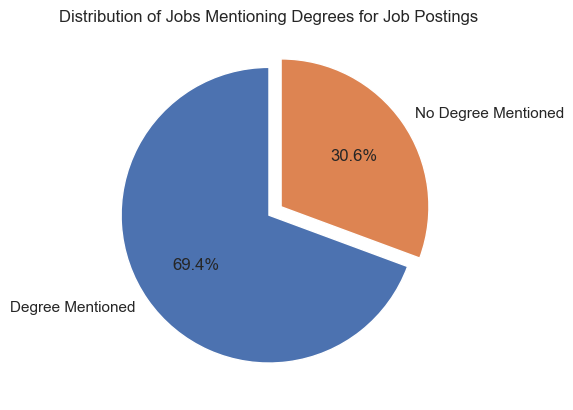

In [45]:
# job opportunities

df.job_no_degree_mention.value_counts().plot(kind = 'pie', startangle = 90, autopct = '%1.1f%%', explode = (0, 0.1), labels=['Degree Mentioned', 'No Degree Mentioned'])
plt.ylabel('')

plt.title('Distribution of Jobs Mentioning Degrees for Job Postings')
plt.show()

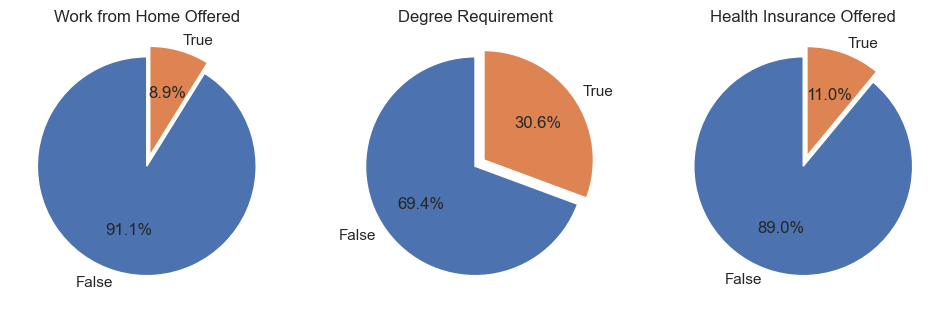

In [48]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1,3, figsize=(12,4))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels = ['False', 'True'], startangle = 90, autopct = '%1.1f%%', explode = (0, 0.1))
    ax[i].set_title(title)

plt.show()

# Limit the analysis to Canada

In [49]:
df_CA = df[df.job_country=='Canada'].copy()

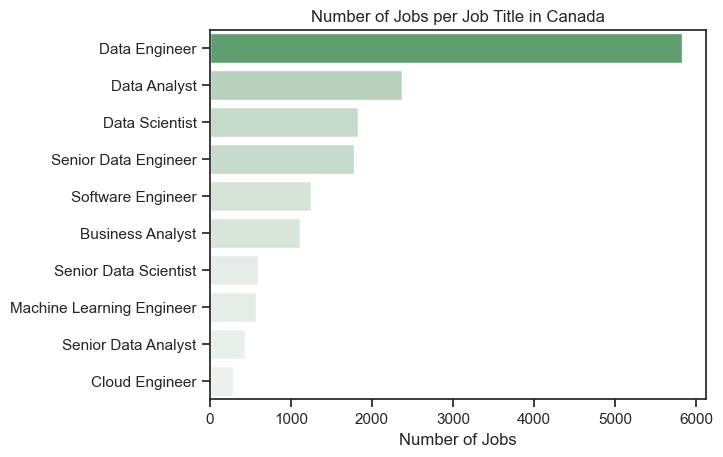

In [51]:
# Number of jobs titles per job title

job_postings = df_CA.job_title_short.value_counts().reset_index(name = 'job_count')


sns.barplot(data = job_postings, x = 'job_count', y = 'job_title_short', hue = 'job_count', palette='light:g', legend = False)
ax = plt.gca()
ax.set_title('Number of Jobs per Job Title in Canada')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

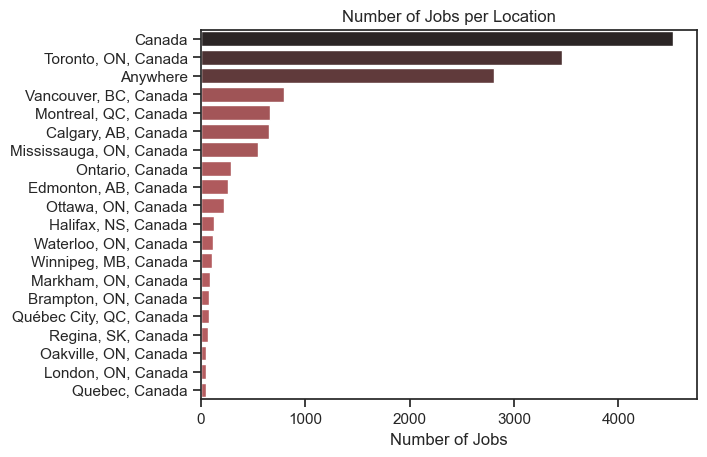

In [52]:
# Number of jobs titles per location

job_postings = df_CA.job_location.value_counts().head(20).reset_index(name = 'job_count')

sns.barplot(data = job_postings, x = 'job_count', y = 'job_location', hue = 'job_count', palette='dark:r_r', legend = False)
ax = plt.gca()
ax.set_title('Number of Jobs per Location')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

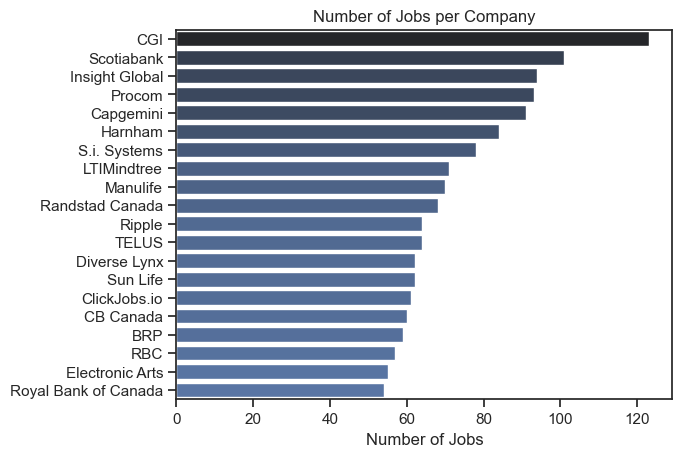

In [54]:
# Number of jobs titles per company

job_postings = df_CA.company_name.value_counts().head(20).reset_index(name = 'job_count')

sns.set_theme(style='ticks')
sns.barplot(data = job_postings, x = 'job_count', y = 'company_name', hue = 'job_count', palette='dark:b_r', legend = False)
ax = plt.gca()
ax.set_title('Number of Jobs per Company')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

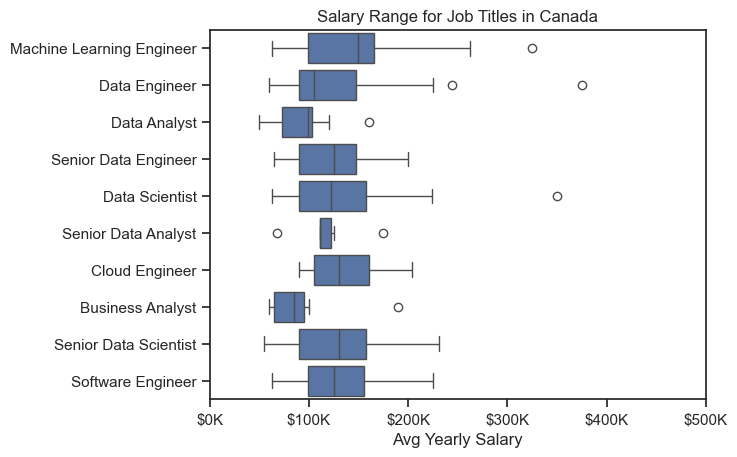

In [55]:
# salaries range by job titles

sns.boxplot(data = df_CA, x = 'salary_year_avg', y = 'job_title_short')
plt.title('Salary Range for Job Titles in Canada')
plt.xlabel('Avg Yearly Salary')
plt.ylabel('')
ax = plt.gca() # gca = get current axis
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0,500_000)

plt.show()

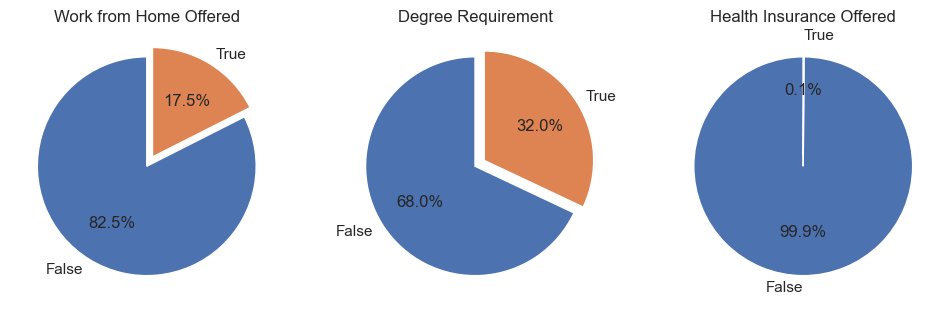

In [ ]:
# job opportunities
# 
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1,3, figsize=(12,4))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_CA[column].value_counts(), labels = ['False', 'True'], startangle = 90, autopct = '%1.1f%%', explode = (0, 0.1))
    ax[i].set_title(title)

plt.show()

In [ ]:
# reduce the dataset to Data Analyst

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
319096,Cloud Engineer,Azure Engineer,"Toronto, ON, Canada",via LinkedIn,Full-time,False,Canada,2023-04-26 17:21:44,False,False,Canada,None,NaN,NaN,Bull IT Services,"[azure, databricks]","{'cloud': ['azure', 'databricks']}"
103073,Data Analyst,Data Analyst,"Calgary, AB, Canada",via LinkedIn,Full-time,False,Canada,2023-10-04 00:20:43,True,False,Canada,None,NaN,NaN,ATB Financial,"[sql, tableau, spreadsheet]","{'analyst_tools': ['tableau', 'spreadsheet'], ..."
554963,Business Analyst,Analyst(Healthcare),Canada,via BeBee Canada,Full-time,False,Canada,2023-11-04 19:55:29,False,False,Canada,None,NaN,NaN,Government Entity,None,None
742269,Data Analyst,"Evaluation and Data Analyst, Calgary Zone (Rem...","Calgary, AB, Canada",via Indeed,Full-time,False,Canada,2023-09-06 20:32:39,False,False,Canada,None,NaN,NaN,Calgary Foothills Primary Care Network,"[sas, sas, sql, excel, word, powerpoint, spss,...","{'analyst_tools': ['sas', 'excel', 'word', 'po..."
546729,Data Analyst,Data Analyst,"Calgary, AB, Canada",via BeBee Canada,Full-time,False,Canada,2023-12-26 19:20:22,True,False,Canada,None,NaN,NaN,Validere Technologies Inc.,"[python, sql, linux, macos, git]","{'os': ['linux', 'macos'], 'other': ['git'], '..."
616772,Senior Data Engineer,Senior Data Engineer,"Vancouver, BC, Canada",via ZipRecruiter,Full-time,False,Canada,2023-07-30 12:41:12,False,False,Canada,None,NaN,NaN,Capgemini,"[python, aws, airflow, spark]","{'cloud': ['aws'], 'libraries': ['airflow', 's..."
595930,Data Scientist,data scientist,"Edmonton, AB, Canada",via BeBee Canada,Full-time,False,Canada,2023-06-04 10:08:19,False,False,Canada,None,NaN,NaN,EliteGlobal Group Ltd,"[sql, word, spreadsheet]","{'analyst_tools': ['word', 'spreadsheet'], 'pr..."
250639,Data Engineer,Lead Data Engineer,"Edmonton, AB, Canada",via BeBee Canada,Full-time,False,Canada,2023-07-01 07:09:20,False,False,Canada,None,NaN,NaN,Finney-Taylor Consulting Group Ltd.,"[aws, azure, spark]","{'cloud': ['aws', 'azure'], 'libraries': ['spa..."
578526,Senior Data Engineer,SENIOR DATA ENGINEER & ANALYST,"Montreal, QC, Canada",via Tarta.ai,Full-time,False,Canada,2023-03-22 09:33:27,False,False,Canada,None,NaN,NaN,Life House Group,[c],{'programming': ['c']}
189206,Senior Data Engineer,Sr Data Solutions Engineer,Canada,via BeBee Canada,Full-time,False,Canada,2023-04-23 15:12:16,False,False,Canada,None,NaN,NaN,Sun Life Financial,"[sql, db2, sql server, cassandra, aws, oracle,...","{'analyst_tools': ['visio', 'powerpoint'], 'cl..."


In [58]:
df_DA_CA = df_CA[df_CA.job_title_short=='Data Analyst'].copy()

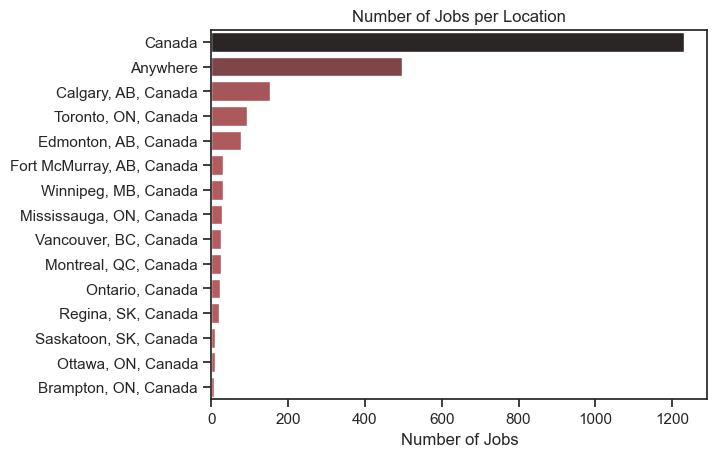

In [62]:
# Number of jobs titles per location

job_postings = df_DA_CA.job_location.value_counts().head(15).reset_index(name = 'job_count')

sns.barplot(data = job_postings, x = 'job_count', y = 'job_location', hue = 'job_count', palette='dark:r_r', legend = False)
ax = plt.gca()
ax.set_title('Number of Jobs per Location')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

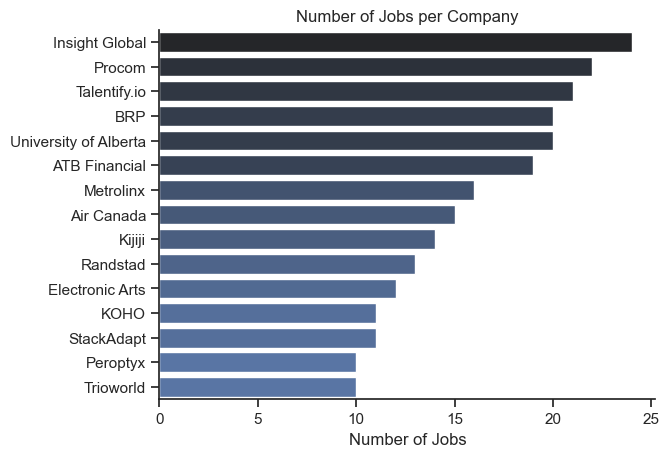

In [65]:
# Number of jobs titles per company

job_postings = df_DA_CA.company_name.value_counts().head(15).reset_index(name = 'job_count')

sns.set_theme(style='ticks')
sns.barplot(data = job_postings, x = 'job_count', y = 'company_name', hue = 'job_count', palette='dark:b_r', legend = False)
sns.despine() # removes border
ax = plt.gca()
ax.set_title('Number of Jobs per Company')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

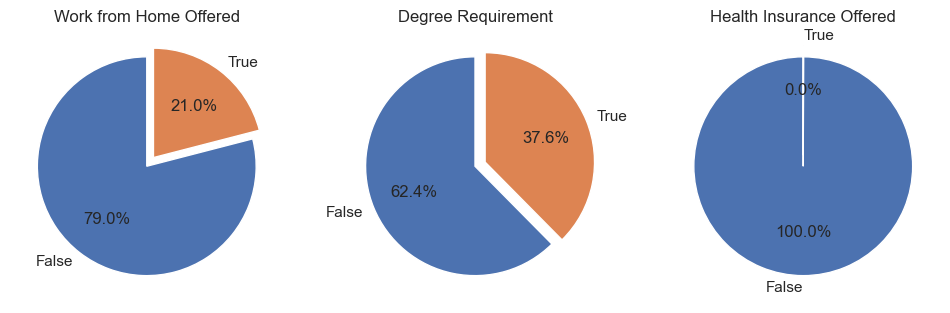

In [63]:
# job opportunities
# 
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1,3, figsize=(12,4))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_CA[column].value_counts(), labels = ['False', 'True'], startangle = 90, autopct = '%1.1f%%', explode = (0, 0.1))
    ax[i].set_title(title)

plt.show()